# PCA 후 코사인 거리 기반 군집화
1. kmeans
2. agg
3. meanshift
4. spectral

# 기본설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
user_data = pd.read_csv('/content/drive/MyDrive/평진/데이터분석/FIFA_ONLINE4_analysis/데이터/user_data.csv',encoding='cp949',index_col=0)
user_data.head()

,id_formation,matchType,possession,shootInPenalty,shootHeading,shootOutPenalty,shootTotal,in_rate,out_rate,heading_rate,...,center,line2,center_fw_one,center_mf_one,side_fw_one,side_df_one,center_one,side_one,line2_one,cnt
0,004ed741426633f14e3e8b5b_442,50.0,0.526000,3.200000,1.100000,2.800000,7.100000,0.604722,0.395278,0.130556,...,5.0,4.0,45.200000,41.325000,25.00000,11.800000,42.766667,14.525000,35.800000,10.0
1,009357e613446985dfd18622_451,50.0,0.489375,2.875000,0.937500,4.000000,7.812500,0.501940,0.498060,0.129230,...,4.0,5.0,28.437500,37.250000,24.90625,15.000000,35.046875,19.953125,32.312500,16.0
2,00c0fec278956d51bb63a3a2_523,50.0,0.522667,3.266667,3.533333,1.533333,8.333333,0.832239,0.167761,0.429663,...,5.0,2.0,34.977778,37.533333,NaN,18.266667,36.000000,18.266667,37.533333,15.0
3,01247880cf81e161d85bf2f3_523,50.0,0.488182,2.545455,1.000000,3.272727,6.818182,0.523737,0.476263,0.154545,...,5.0,2.0,28.787879,27.954545,NaN,18.454545,28.454545,18.454545,27.954545,11.0
4,014c6e8a031b7941ee2f9b24_433,50.0,0.503750,4.687500,0.875000,1.437500,7.000000,0.817560,0.182440,0.121354,...,4.0,3.0,32.750000,28.958333,22.37500,14.656250,29.906250,18.515625,28.958333,16.0


In [4]:
# 포메이션 결합용 데이터
data = pd.read_csv('/content/drive/MyDrive/평진/데이터분석/핍파/data.csv',encoding='cp949',index_col=0)
data.head()

,matchId,matchDate,matchType,matchInfo,id,accessId,possession,nickname,matchResult,shootInPenalty,...,center_fw_one,center_mf_one,side_fw_one,side_df_one,center_one,side_one,line2_one,formation,id_formation,cnt
0,6430c714a4ebcc072d13f3e7,2023-04-08T10:54:55,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.53,솔깃한,패,2,...,21.0,31.666667,22.5,14.0,29.00,18.25,28.0,451,4b0a833e4121d0c3f6dc9a2e_451,13
1,642dcb56dc1ac4544c53deb8,2023-04-06T04:37:10,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.62,솔깃한,승,2,...,34.0,34.333333,30.0,16.0,34.25,23.00,32.6,451,4b0a833e4121d0c3f6dc9a2e_451,13
2,642c09958e38507a9ae58bc4,2023-04-04T20:37:05,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.46,솔깃한,패,3,...,40.0,23.333333,17.5,12.0,27.50,14.75,21.0,451,4b0a833e4121d0c3f6dc9a2e_451,13
3,642b2e2be02c06eebd0216c2,2023-04-04T05:01:48,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.55,솔깃한,패,2,...,30.0,36.333333,18.5,15.5,34.75,17.00,29.2,451,4b0a833e4121d0c3f6dc9a2e_451,13
4,6426c6325f5c0fd461f34f51,2023-03-31T20:50:42,50,"{'accessId': '4b0a833e4121d0c3f6dc9a2e', 'nick...",4b0a833e4121d0c3f6dc9a2e,4b0a833e4121d0c3f6dc9a2e,0.47,솔깃한,패,1,...,25.0,34.000000,24.5,13.5,31.75,19.00,30.2,451,4b0a833e4121d0c3f6dc9a2e_451,13


In [5]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237 entries, 0 to 1236
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_formation       1237 non-null   object 
 1   matchType          1237 non-null   float64
 2   possession         1237 non-null   float64
 3   shootInPenalty     1237 non-null   float64
 4   shootHeading       1237 non-null   float64
 5   shootOutPenalty    1237 non-null   float64
 6   shootTotal         1237 non-null   float64
 7   in_rate            1237 non-null   float64
 8   out_rate           1237 non-null   float64
 9   heading_rate       1237 non-null   float64
 10  passTry            1237 non-null   float64
 11  shortPassTry       1237 non-null   float64
 12  longpassTry        1237 non-null   float64
 13  throughpass        1237 non-null   float64
 14  short_rate         1237 non-null   float64
 15  long_rate          1237 non-null   float64
 16  thr_rate           1237 

# EDA

In [6]:
user_data = pd.merge(user_data,data[['id_formation','formation']],on='id_formation',how='left')
user_data.drop_duplicates(inplace=True)
user_data['df_one'] = (user_data['center_df_posses'] + user_data['center_df_pass']) / user_data['df']

## 변수 선정 근거
1. 어떤 공격(슈팅)을 선호하는가 : 헤딩슛 / 페널티밖 슛 / 페널티 안 슛(헤딩 제외)
2. 어떤 패스를 선호하는가 : 숏패스 / 롱패스 / 쓰루패스
4. 주 전개 활용 위치 : 중앙 / 측면
3. 어떤 포지션의 선수들을 주로 활용하는가 : 오버래핑 / 공간창출(점유율, 드리블) / 전방압박 / 역습 등을 확인하기 위함.

### 유저마다 포지션 별 선수의 수가 다르며 단순 횟수로 비교하기보단 전체 횟수 대비 특정 행동의 비율로 비교하는것이 유저 간 상대적으로 두드러지게 보일 수 있다고 판단됨

In [7]:
df = user_data[['in_rate','out_rate','heading_rate','short_rate','thr_rate','long_rate','side_one','center_one','df_one','formation']]
df

,in_rate,out_rate,heading_rate,short_rate,thr_rate,long_rate,side_one,center_one,df_one,formation
0,0.604722,0.395278,0.130556,0.880041,0.090767,0.035906,14.525000,42.766667,4.050000,442
10,0.501940,0.498060,0.129230,0.779673,0.192258,0.068342,19.953125,35.046875,4.109375,451
26,0.832239,0.167761,0.429663,0.798512,0.143594,0.060786,18.266667,36.000000,4.506667,523
41,0.523737,0.476263,0.154545,0.772228,0.174343,0.058769,18.454545,28.454545,4.690909,523
52,0.817560,0.182440,0.121354,0.610595,0.350935,0.051902,18.515625,29.906250,3.515625,433
...,...,...,...,...,...,...,...,...,...,...
18243,0.758310,0.241690,0.057586,0.832230,0.156127,0.010402,12.058824,34.000000,4.458824,523
18260,0.668385,0.331615,0.026984,0.785109,0.172116,0.035314,16.464286,36.571429,3.553571,451
18274,0.570991,0.429009,0.161253,0.685540,0.245124,0.075551,21.450000,26.633333,4.616667,451
18289,0.381407,0.618593,0.161710,0.806856,0.147647,0.032023,17.475000,29.080000,3.720000,523


In [8]:
df.corr().round(2)

,in_rate,out_rate,heading_rate,short_rate,thr_rate,long_rate,side_one,center_one,df_one,formation
in_rate,1.00,-1.00,0.22,-0.14,0.14,0.10,0.07,-0.06,-0.11,-0.05
out_rate,-1.00,1.00,-0.22,0.14,-0.14,-0.10,-0.07,0.06,0.11,0.05
heading_rate,0.22,-0.22,1.00,-0.26,0.14,0.43,0.06,-0.24,-0.01,0.01
short_rate,-0.14,0.14,-0.26,1.00,-0.98,-0.29,0.17,0.48,-0.06,0.04
thr_rate,0.14,-0.14,0.14,-0.98,1.00,0.16,-0.15,-0.40,0.06,-0.04
long_rate,0.10,-0.10,0.43,-0.29,0.16,1.00,-0.06,-0.38,-0.03,-0.03
side_one,0.07,-0.07,0.06,0.17,-0.15,-0.06,1.00,0.33,-0.08,-0.15
center_one,-0.06,0.06,-0.24,0.48,-0.40,-0.38,0.33,1.00,0.03,0.02
df_one,-0.11,0.11,-0.01,-0.06,0.06,-0.03,-0.08,0.03,1.00,0.34
formation,-0.05,0.05,0.01,0.04,-0.04,-0.03,-0.15,0.02,0.34,1.00


## 상관관계 해석
1. 인슛과 아웃슛은 매우 높은 음의 상관관계를 가지므로 다중 공선성을 고려하여 아웃슛을 제거.  
2. 숏패스와 예상과는 달리 롱패스가 아닌 쓰루패스와 매우 높은 음의 상관관계를 가짐. 이는 잔패스 위주의 전개와 다이렉트 패스를 활용한 전개의 차이라고 판단됨. 

따라서 두 변수는 제거


In [9]:
df = user_data[['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one','formation']]

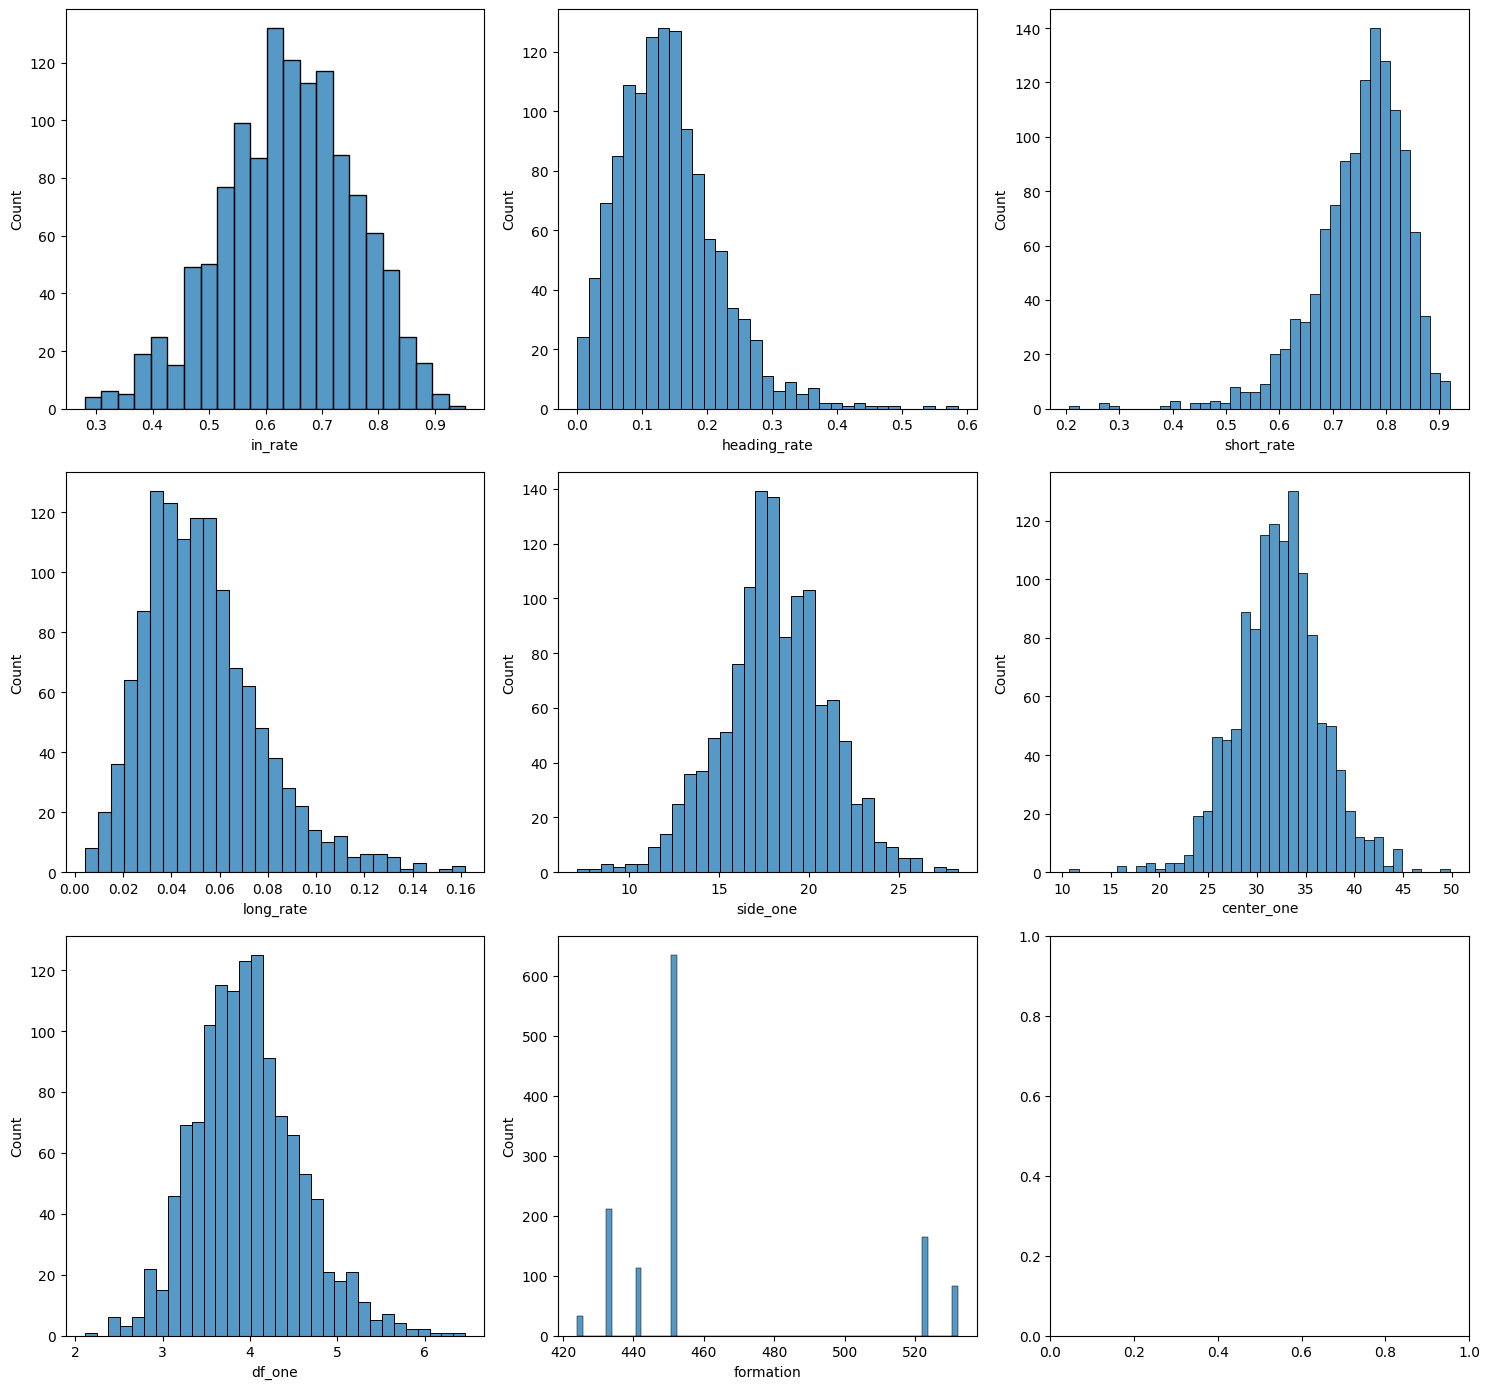

In [10]:
# 데이터프레임 df의 모든 변수들에 대한 히스토그램을 그립니다.
fig, axs = plt.subplots(nrows=len(df.columns)//3+1, ncols=3, figsize=(15, 5*len(df.columns)//3+1))

for i, var in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.histplot(data=df, x=var, ax=axs[row, col])

plt.tight_layout()
plt.show()


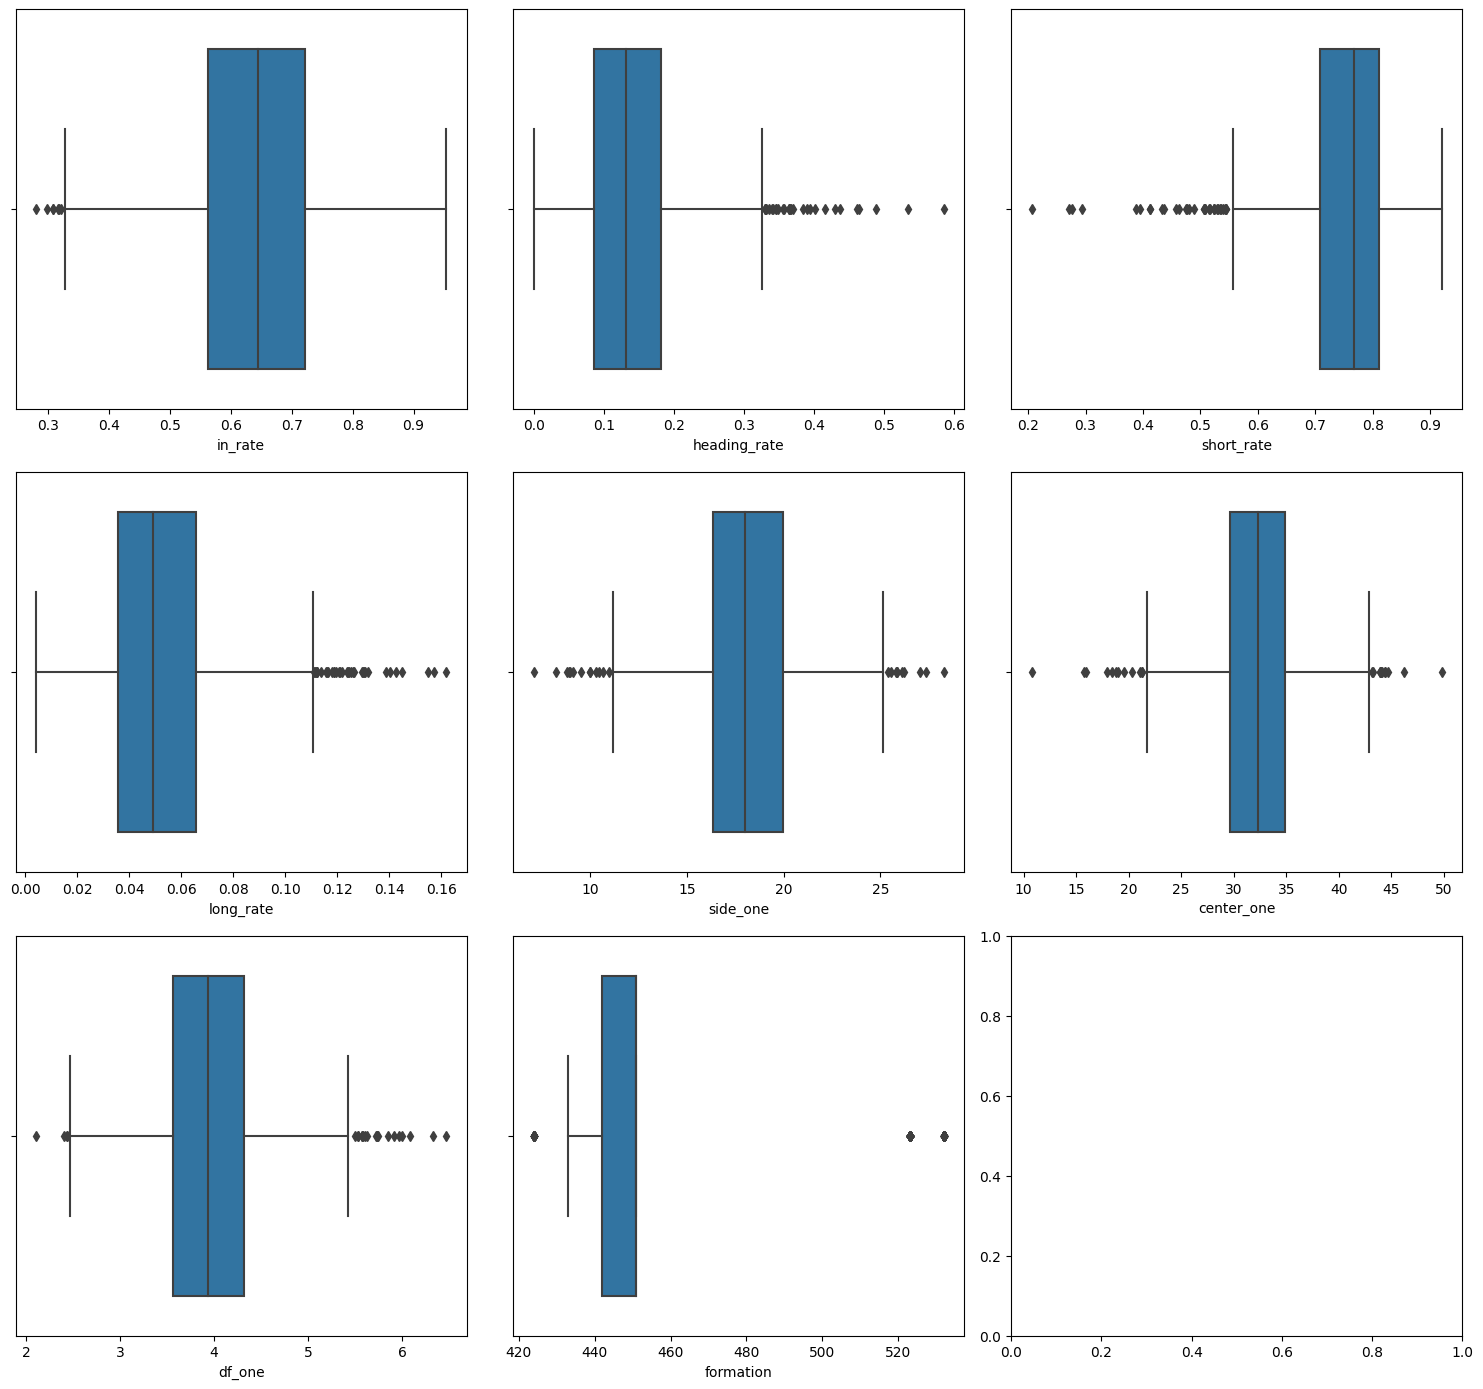

In [11]:
# 데이터프레임 df의 모든 변수들에 대한 히스토그램을 그립니다.
fig, axs = plt.subplots(nrows=len(df.columns)//3+1, ncols=3, figsize=(15, 5*len(df.columns)//3+1))

for i, var in enumerate(df.columns):
    row = i // 3
    col = i % 3
    sns.boxplot(data=df, x=var, ax=axs[row, col])

plt.tight_layout()
plt.show()


In [12]:
df.describe()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one,formation
count,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000,1237.000000
mean,0.640656,0.140074,0.751178,0.052804,18.074589,32.296207,3.968538,461.324171
std,0.117211,0.077061,0.086592,0.024209,2.949930,4.336384,0.596678,33.136633
min,0.279927,0.000000,0.206241,0.004125,7.088235,10.766667,2.107692,424.000000
25%,0.562881,0.085967,0.707932,0.035598,16.359375,29.597222,3.562500,442.000000
50%,0.644892,0.131471,0.766860,0.049272,17.984375,32.333333,3.937500,451.000000
75%,0.721131,0.182216,0.810287,0.065761,19.950000,34.921053,4.314286,451.000000
max,0.953549,0.585606,0.920070,0.161810,28.281250,49.796875,6.464286,532.000000


In [13]:
df.shape

(1237, 8)

## 이상치 제거 : logical & 1.5 ~ 3 IQR

In [14]:
# 추가 이상치 제거 >> 표준화에 영향을 주지않을정도로만..
df = df[df.center_one > 17]
df = df[df.center_one < 46]
df = df[df.side_one > 5]
df = df[df.heading_rate < 0.5] 
df = df[df.short_rate > 0.3]
#df = df[df.defence_fw < 15]

In [15]:
df.shape

(1226, 8)

In [69]:
df.head()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one,cl
0,0.604722,0.130556,0.880041,0.035906,14.525000,42.766667,4.050000,0
10,0.501940,0.129230,0.779673,0.068342,19.953125,35.046875,4.109375,1
26,0.832239,0.429663,0.798512,0.060786,18.266667,36.000000,4.506667,2
41,0.523737,0.154545,0.772228,0.058769,18.454545,28.454545,4.690909,1
52,0.817560,0.121354,0.610595,0.051902,18.515625,29.906250,3.515625,2


In [16]:
# pairplot 그리기
sns.pairplot(data=df,hue='formation')

Output hidden; open in https://colab.research.google.com to view.

In [17]:
df.drop('formation',axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 

scaler = StandardScaler()
x = scaler.fit_transform(df) # x객체에 x를 표준화한 데이터를 저장
features = ['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one']
X = pd.DataFrame(x, columns=features)
X.head()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,-0.302269,-0.114886,1.551117,-0.696068,-1.209063,2.498382,0.138116
1,-1.182020,-0.132810,0.326506,0.652081,0.638236,0.646669,0.238766
2,1.645137,3.928455,0.556365,0.338051,0.064301,0.875291,0.912237
3,-0.995450,0.209409,0.235672,0.254207,0.128240,-0.934605,1.224557
4,1.519489,-0.239271,-1.736445,-0.031213,0.149026,-0.586391,-0.767732


In [19]:
round(X.describe(),3)

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
count,1226.000,1226.000,1226.000,1226.000,1226.000,1226.000,1226.000
mean,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.082,-1.880,-4.450,-2.017,-3.740,-3.348,-2.659
25%,-0.663,-0.715,-0.543,-0.708,-0.584,-0.647,-0.684
50%,0.040,-0.103,0.171,-0.144,-0.034,0.008,-0.053
75%,0.682,0.576,0.701,0.526,0.637,0.617,0.583
max,2.683,4.731,2.040,4.537,3.472,2.954,3.986


# PCA

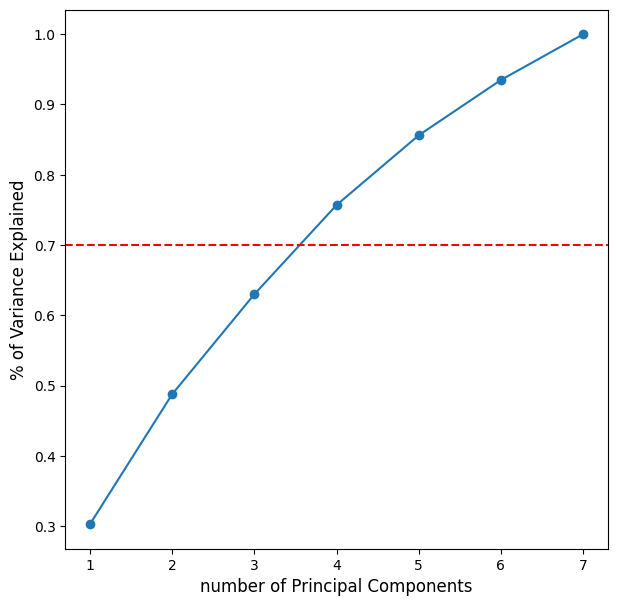

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=printcipalComponents)
principalDf.head()

plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(range(1, principalDf.shape[1]+1), np.cumsum(pca.explained_variance_ratio_),marker='o')
plt.xlabel("number of Principal Components", fontsize=12)
plt.ylabel("% of Variance Explained", fontsize=12)
plt.axhline(y=0.7, color='red', linestyle='--')
plt.show()

In [21]:
pca = PCA(n_components=4) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data=printcipalComponents)
principalDf.head()
# 주성분으로 이루어진 데이터 프레임 구성

,0,1,2,3
0,-2.235583,0.276740,0.271922,-0.145501
1,-0.594863,-0.011818,0.843333,1.197454
2,1.375950,-2.400384,1.963909,-0.811625
3,0.394270,0.928444,1.193078,0.556678
4,1.283053,-0.660185,-1.198109,-1.226025


In [22]:
# 누적 설명력
print(sum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_

0.7568242412346546


array([0.30256177, 0.18496168, 0.14230949, 0.1269913 ])

In [23]:
pd.DataFrame(pca.components_.round(3), columns = features)

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,0.187,0.414,-0.496,0.479,-0.219,-0.519,0.026
1,-0.480,-0.392,-0.098,-0.171,-0.619,-0.271,0.347
2,-0.214,0.326,0.040,0.157,0.287,0.210,0.834
3,-0.761,0.145,0.216,0.422,0.160,-0.061,-0.382


In [24]:
round(X.describe(),3)

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
count,1226.000,1226.000,1226.000,1226.000,1226.000,1226.000,1226.000
mean,0.000,-0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-3.082,-1.880,-4.450,-2.017,-3.740,-3.348,-2.659
25%,-0.663,-0.715,-0.543,-0.708,-0.584,-0.647,-0.684
50%,0.040,-0.103,0.171,-0.144,-0.034,0.008,-0.053
75%,0.682,0.576,0.701,0.526,0.637,0.617,0.583
max,2.683,4.731,2.040,4.537,3.472,2.954,3.986


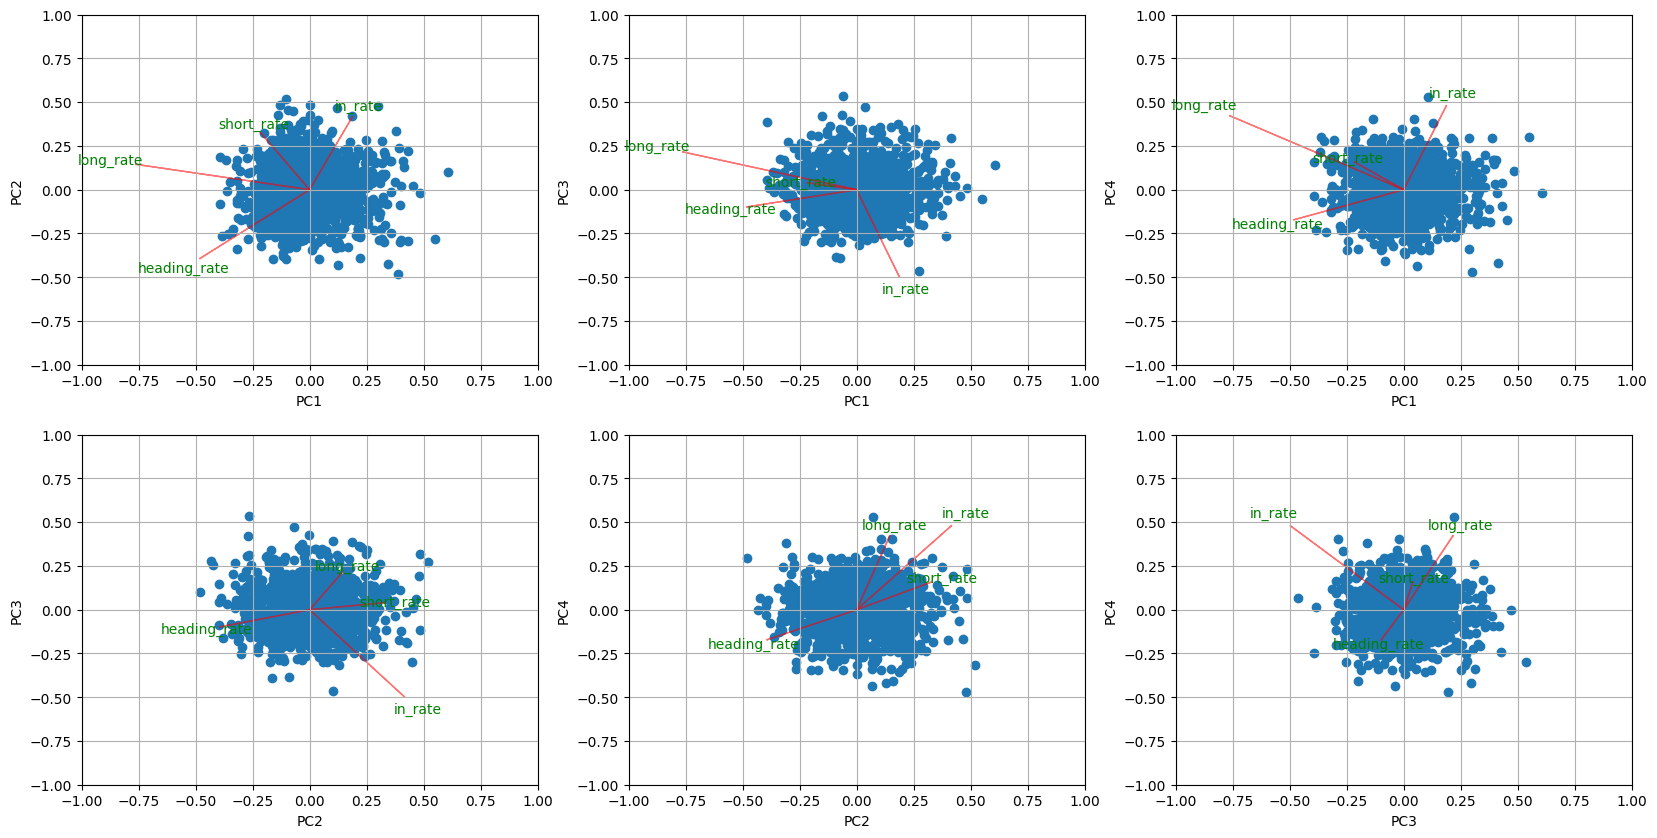

In [25]:
def biplot(score,coeff,pcax,pcay,labels=None):
  pca1=pcax-1
  pca2=pcay-1
  xs = score[:,pca1]
  ys = score[:,pca2]
  n=score.shape[1]
  scalex = 1.0/(xs.max()- xs.min())
  scaley = 1.0/(ys.max()- ys.min())
  plt.scatter(xs*scalex,ys*scaley)
  for i in range(n):
    plt.arrow(0, 0, coeff[i,pca1], coeff[i,pca2],color='r',alpha=0.5)
    if labels is None:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, "Var"+str(i+1), color='g', ha='center', va='center')
    else:
      plt.text(coeff[i,pca1]* 1.15, coeff[i,pca2] * 1.15, labels[i], color='g', ha='center', va='center')
  plt.xlim(-1,1)
  plt.ylim(-1,1)
  plt.xlabel("PC{}".format(pcax))
  plt.ylabel("PC{}".format(pcay))
  plt.grid()

fig,axes = plt.subplots(2,3,figsize=(20,10))
plt.axes(axes[0,0])
biplot(printcipalComponents, pca.components_, 1, 2, labels=X.columns)
plt.axes(axes[0,1])
biplot(printcipalComponents, pca.components_, 1, 3, labels=X.columns)
plt.axes(axes[0,2])
biplot(printcipalComponents, pca.components_, 1, 4, labels=X.columns)
plt.axes(axes[1,0])
biplot(printcipalComponents, pca.components_, 2, 3, labels=X.columns)
plt.axes(axes[1,1])
biplot(printcipalComponents, pca.components_, 2, 4, labels=X.columns)
plt.axes(axes[1,2])
biplot(printcipalComponents, pca.components_, 3, 4, labels=X.columns)

1. 헤딩 롱패스 쓰루패스 활용도 하  >> 역습 지표  

나머지는 해석이 어려움
***
# Clustering

## 1. Kmeans

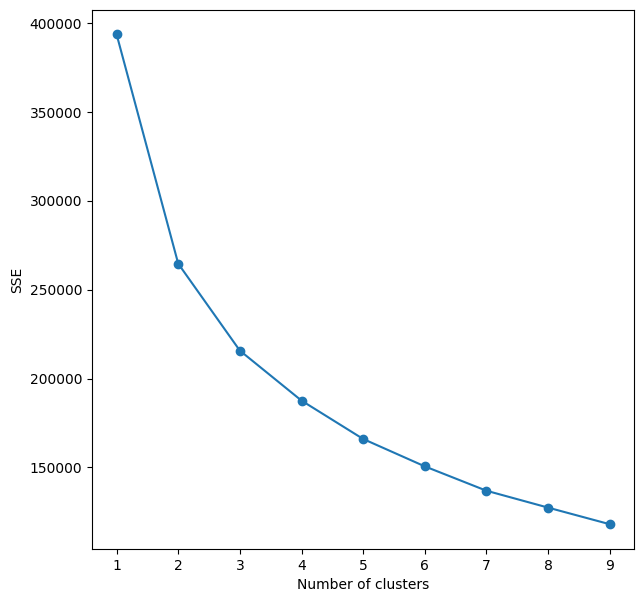

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from collections import Counter

# inertia

# SSE 값을 저장할 리스트 생성
sse = []

# 군집 개수를 1에서 10까지 변화시키면서 KMeans 알고리즘 적용
for i in range(1, 10):
    km = KMeans(n_clusters=i, init='k-means++', random_state=0,n_init=10)
    # 거리 행렬 계산
    distances = pairwise_distances(principalDf, metric='cosine')
    km.fit(distances)
    sse.append(km.inertia_)

# 군집 개수에 따른 SSE 그래프 출력
plt.plot(range(1,10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

4 부터 완만해짐

In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

def plot_silhouette(X, range_n_clusters, metrics):
    """
    X : 입력 데이터
    range_n_clusters : 군집 개수 범위 (list 형태)
    """
    for n_clusters in range_n_clusters:
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(9, 7)

        # 클러스터링 모델 학습
        clusterer = KMeans(n_clusters=n_clusters, random_state=0,n_init=10)
        distances = pairwise_distances(X, metric=metrics)
        cluster_labels = clusterer.fit_predict(distances)

        # 모든 샘플의 실루엣 계수를 계산
        silhouette_avg = silhouette_score(distances, cluster_labels)
        sample_silhouette_values = silhouette_samples(distances, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # i번째 클러스터에 속한 샘플들의 실루엣 계수 값을 추출하여 정렬
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)

            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # 클러스터 이름 및 평균 실루엣 계수 값을 그래프에 입력
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            ax.text(0.8, y_lower + 0.5 * size_cluster_i,
                    str(round(np.mean(ith_cluster_silhouette_values), 2)))
            y_lower = y_upper + 10

        ax.set_title("Number of clusters : " + str(n_clusters))
        ax.set_xlabel("Silhouette Coefficient Values :{mean}".format(mean=round(silhouette_avg,2)))
        ax.set_ylabel("Cluster Label")

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()


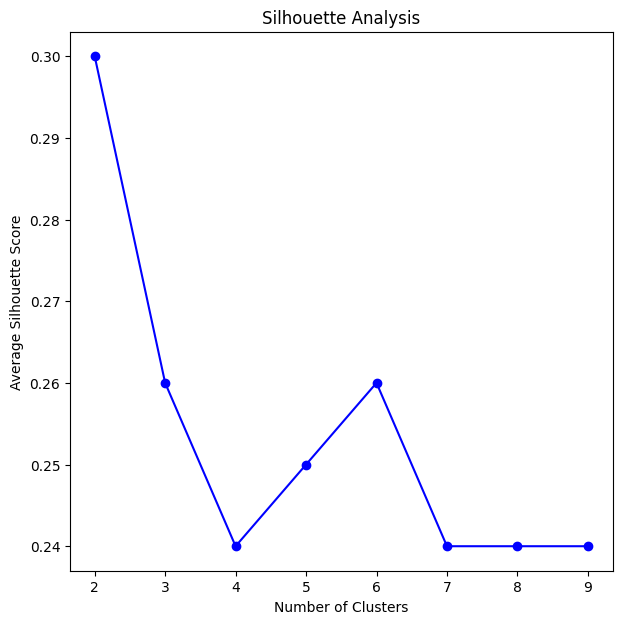

In [28]:
# 군집 개수 범위 설정
k_min, k_max = 2, 9
k_range = range(k_min, k_max+1)

# 각 군집 개수마다 군집 수행 및 실루엣 점수 계산
sil_scores = []
for k in k_range:
    clusterer = KMeans(n_clusters=k, random_state=0, n_init=10)
    distances = pairwise_distances(principalDf, metric='cosine')
    cluster_labels = clusterer.fit_predict(distances)
    sil_score = silhouette_score(distances, cluster_labels)
    sil_scores.append(round(sil_score,2))

# 평균 실루엣 점수 시각화
plt.plot(k_range, sil_scores, 'o-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.xticks(k_range)
plt.show()

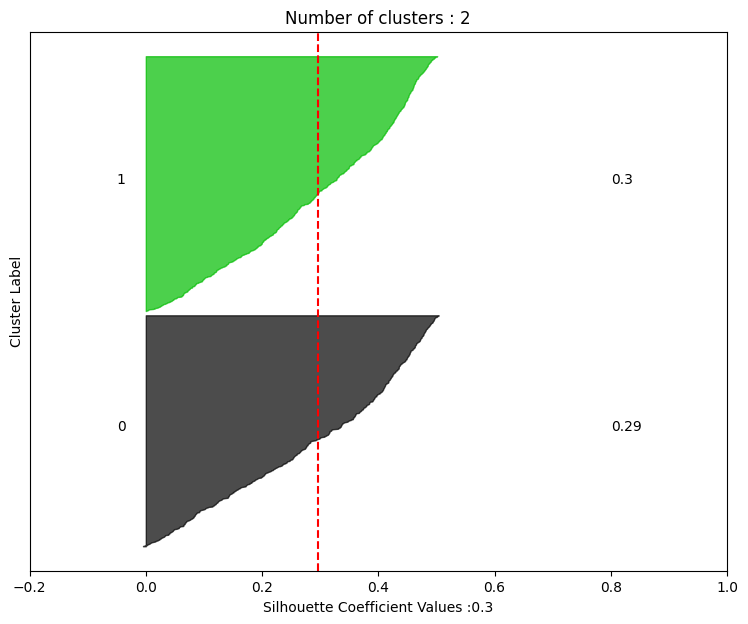

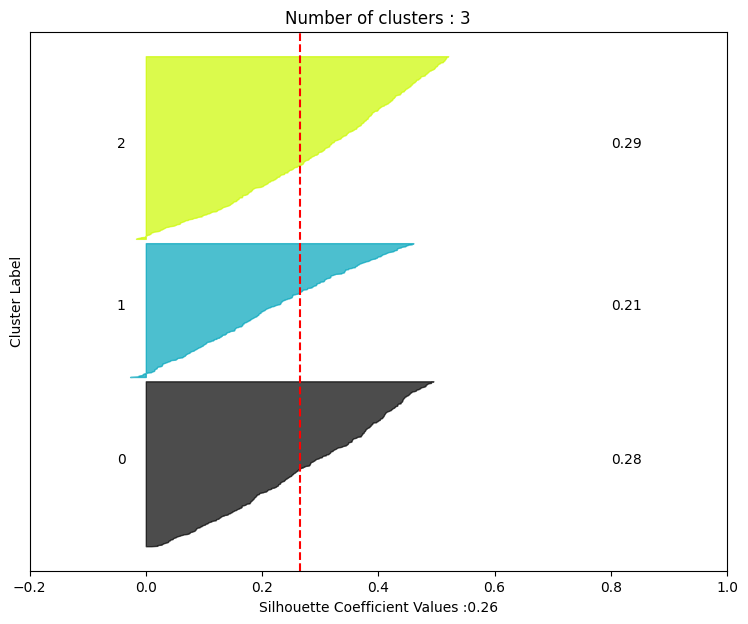

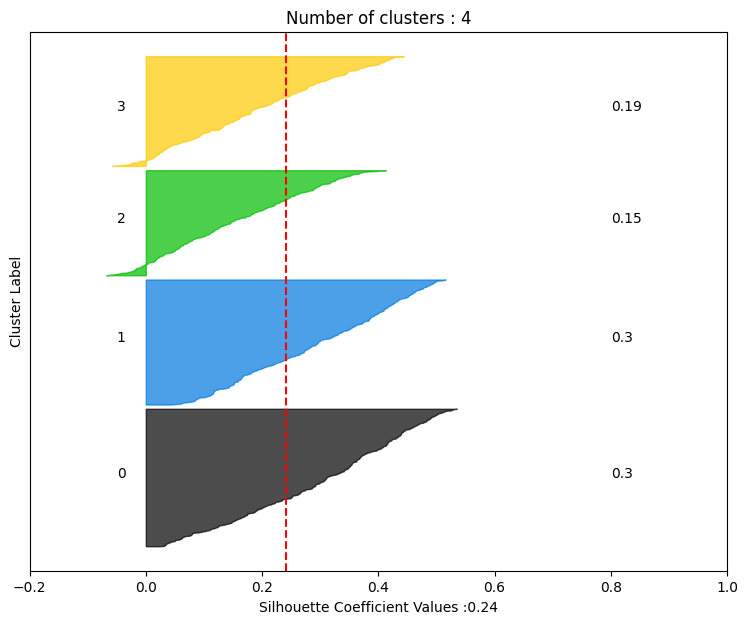

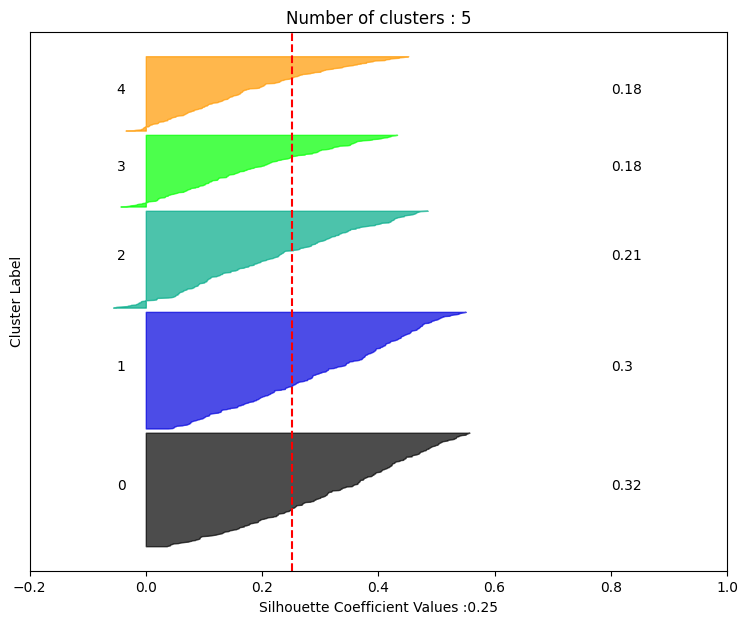

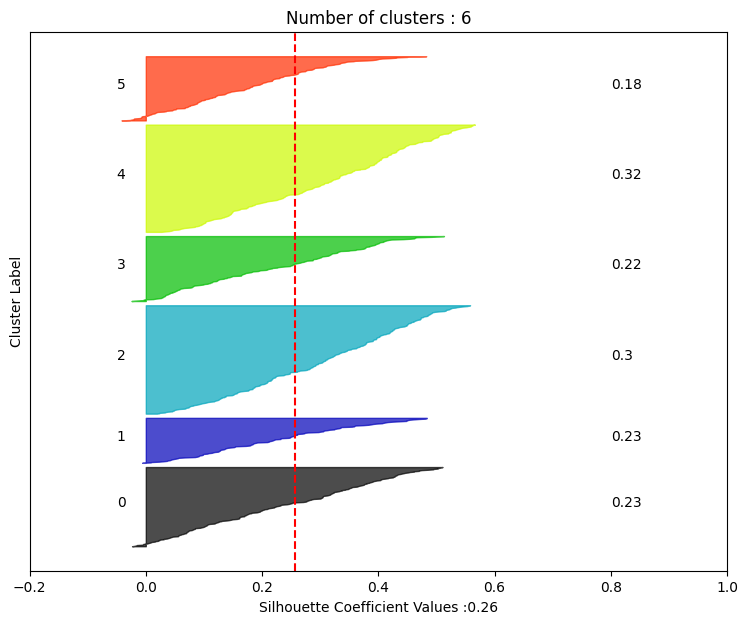

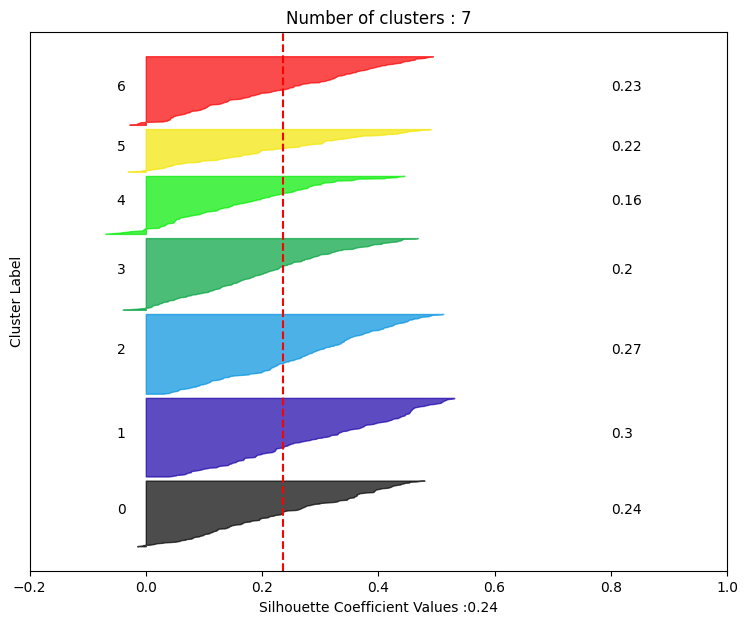

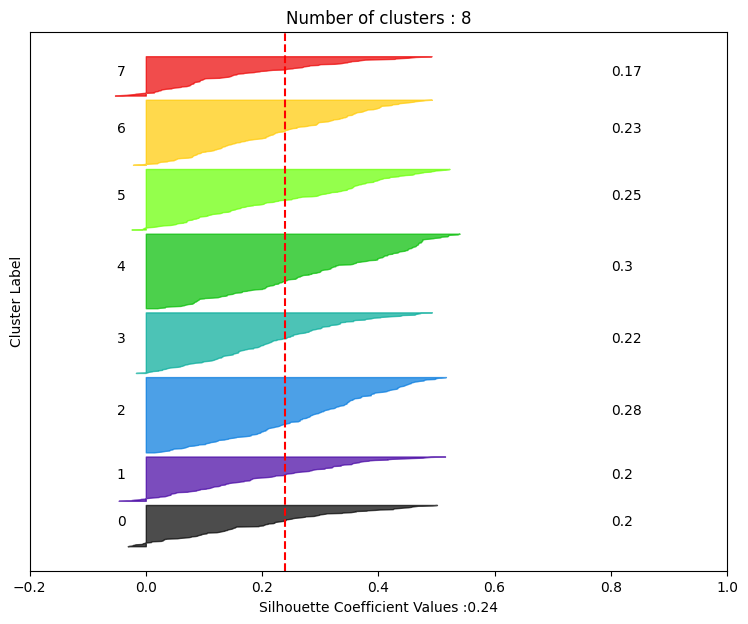

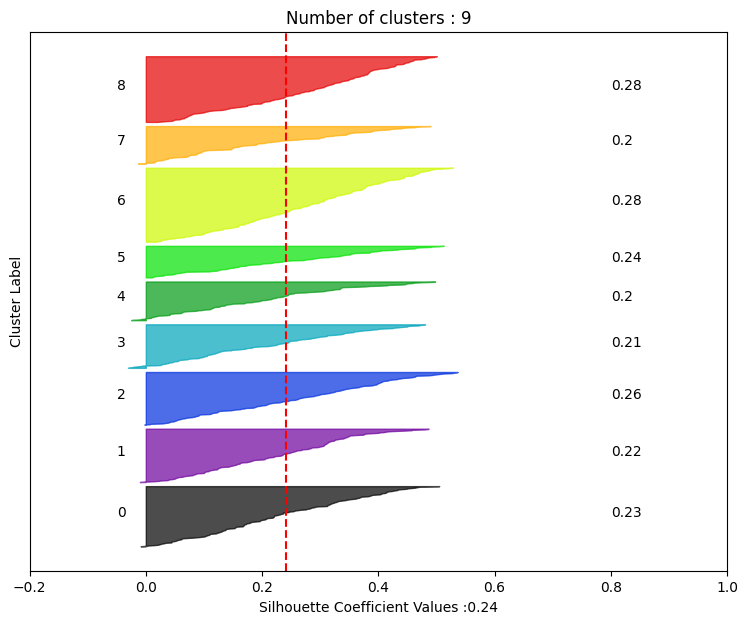

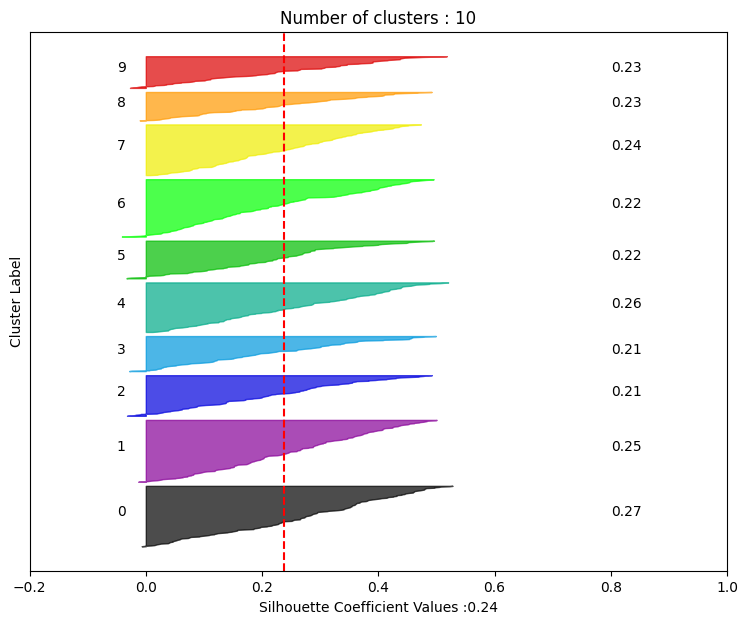

In [29]:
plot_silhouette(principalDf,[2,3,4,5,6,7,8,9,10],'cosine')

In [30]:
# KMeans 군집화
distances = pairwise_distances(principalDf, metric='cosine')
kmeans = KMeans(n_clusters=3, random_state=0, n_init=10).fit(distances)


# 군집별 평균값 계산
print(pd.DataFrame(X).groupby(kmeans.predict(distances)).size())
cluster_kmeans = pd.DataFrame(X).groupby(kmeans.labels_).mean()
cluster_kmeans

0    420
1    341
2    465
dtype: int64


,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,0.179609,-0.374604,0.575445,-0.484762,0.641529,0.785781,-0.348877
1,-0.705635,-0.509698,0.210196,-0.374148,-0.628575,-0.068326,0.544051
2,0.355239,0.712130,-0.673900,0.712224,-0.118491,-0.659632,-0.083856


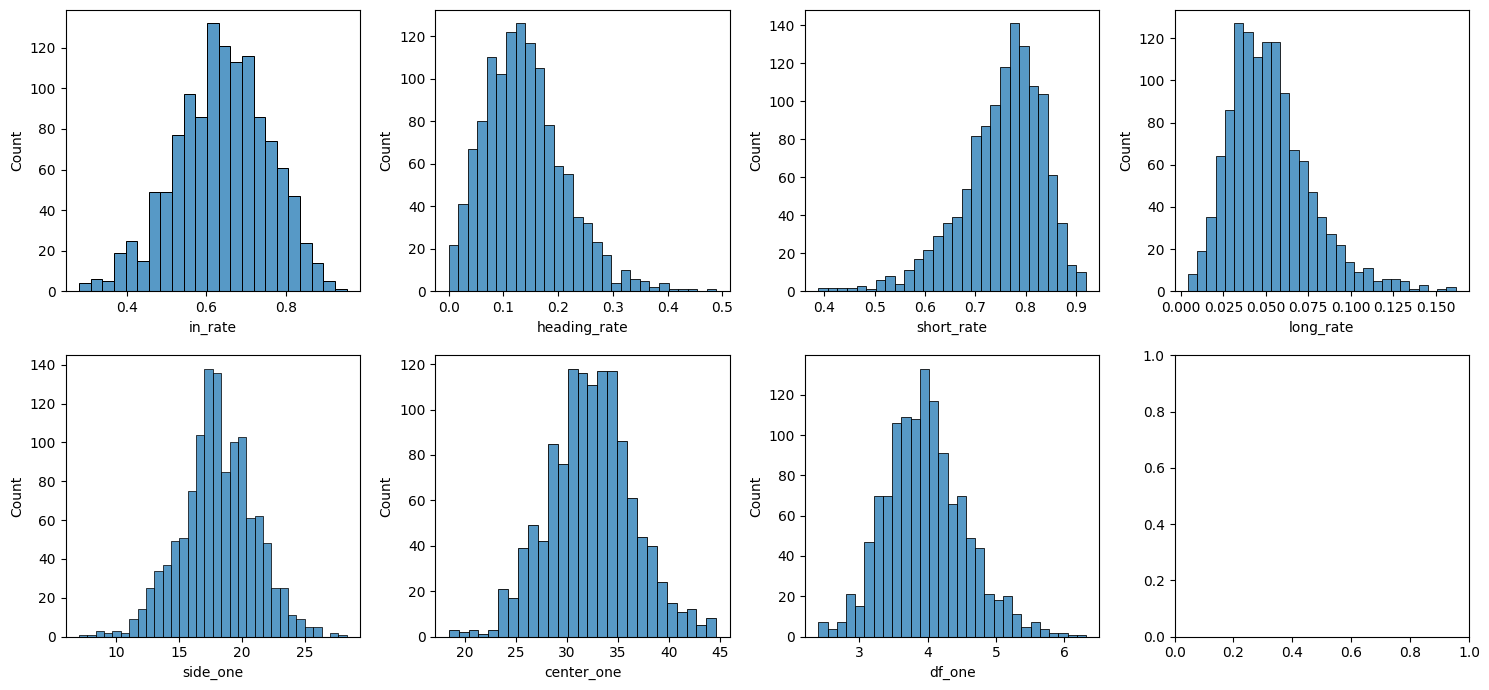

In [31]:
# 분포 확인 후 해석
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(15, 7))

for i, var in enumerate(df.columns):
    col = i if i<4 else i-4
    row = 0 if i<4 else 1
    sns.histplot(data=df, x=var, ax=axs[row,col])

plt.tight_layout()
plt.show()


In [32]:
pd.DataFrame(scaler.inverse_transform(X),
             columns=features).groupby(kmeans.labels_).mean()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,0.661020,0.111343,0.800076,0.040990,19.962801,35.626834,3.762715
1,0.557597,0.101349,0.770140,0.043651,16.230712,32.066061,4.289467
2,0.681539,0.191734,0.697680,0.069789,17.729550,29.600908,3.919055


In [33]:
df.describe()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,0.640037,0.139054,0.752912,0.052653,18.077724,32.350913,3.968523
std,0.116878,0.074006,0.081993,0.024070,2.939610,4.170700,0.590157
min,0.279927,0.000000,0.388189,0.004125,7.088235,18.394737,2.400000
25%,0.562538,0.086134,0.708409,0.035610,16.361742,29.652431,3.564833
50%,0.644725,0.131421,0.766965,0.049190,17.978299,32.383333,3.937500
75%,0.719692,0.181630,0.810380,0.065318,19.949342,34.925116,4.312500
max,0.953549,0.489052,0.920070,0.161810,28.281250,44.666667,6.320000


3개
1. 숏패 측면 중앙 활용도 상 >> 잔패스를 바탕으로 한 빌드업 축구
2. 중거리 중원 수비 >> 수비적인 축구(후방 빌드업) 및 중거리 선호
3. 헤딩 쓰루 롱패 측면 활용 상 >> 선굵은 축구 

6개
1. 아웃슛 측면 저조 >> 중원 전개 선호
2. 수비 활용 밸런스 >> 균형
3. 헤딩저조 숏패 위주 롱패 저조 측면중원 활발 >> 빌드업 축구
4. 헤딩 높음 롱패스 높고 측면 선호 >> 크로스 유저
5. 헤딩 높음 롱패스 선호 >> 선굵은 축구
6. 상대적 2선 활용
***
## agg

In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity

# 데이터 로드 및 cosine distance 계산
cos_dist = 1 - cosine_similarity(principalDf)

# linkage 계산
Z = linkage(cos_dist, method='ward')

# dendrogram 그리기
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram (cosine, ward linkage)')
dendrogram(Z)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


NameError: ignored

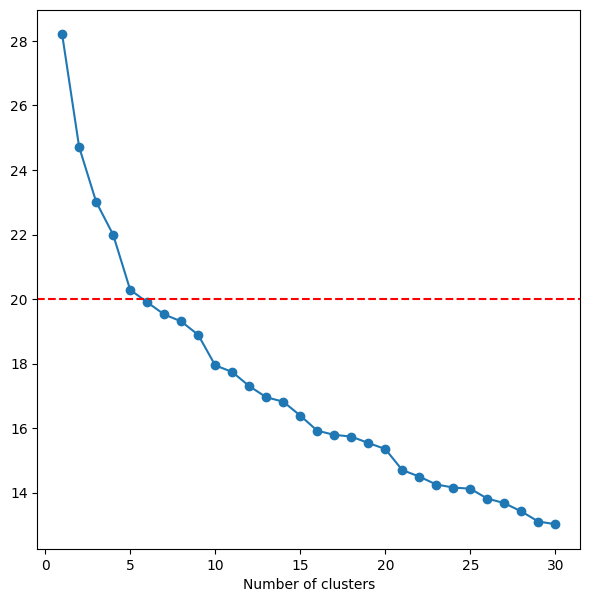

In [35]:
# Elbow Method로 최적의 군집 수 찾기
last = Z[-30:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev, marker='o')
plt.xlabel('Number of clusters')
plt.axhline(y=20,color='red',linestyle='--')
plt.show()

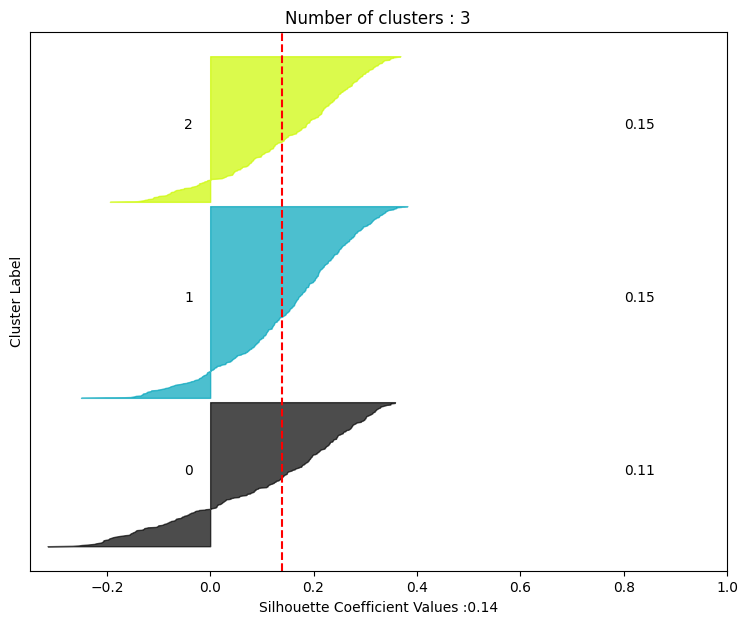

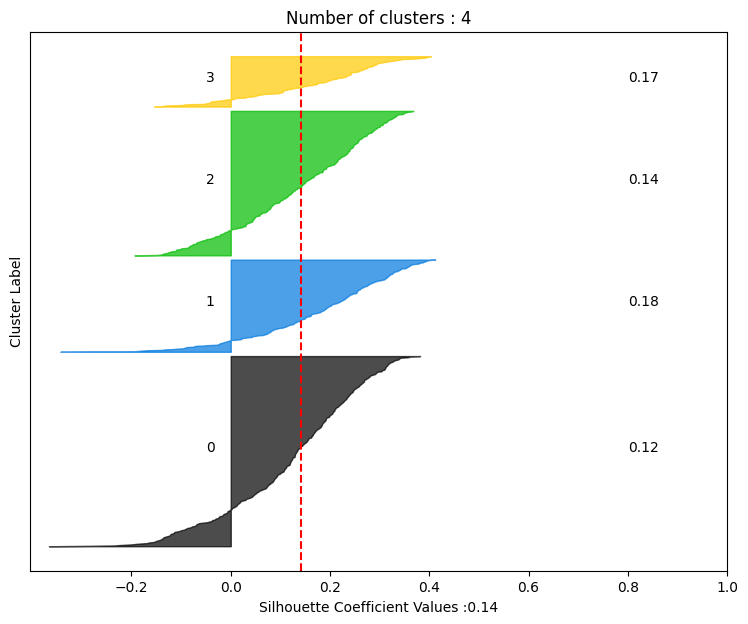

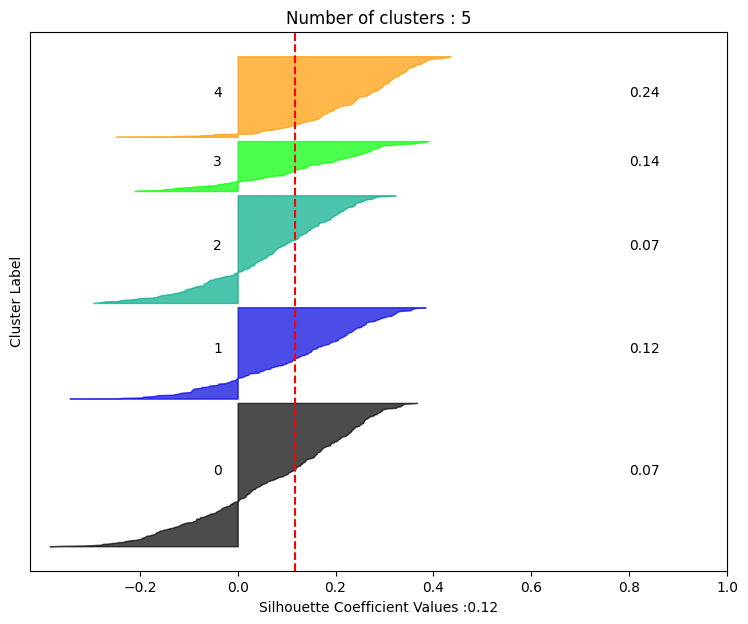

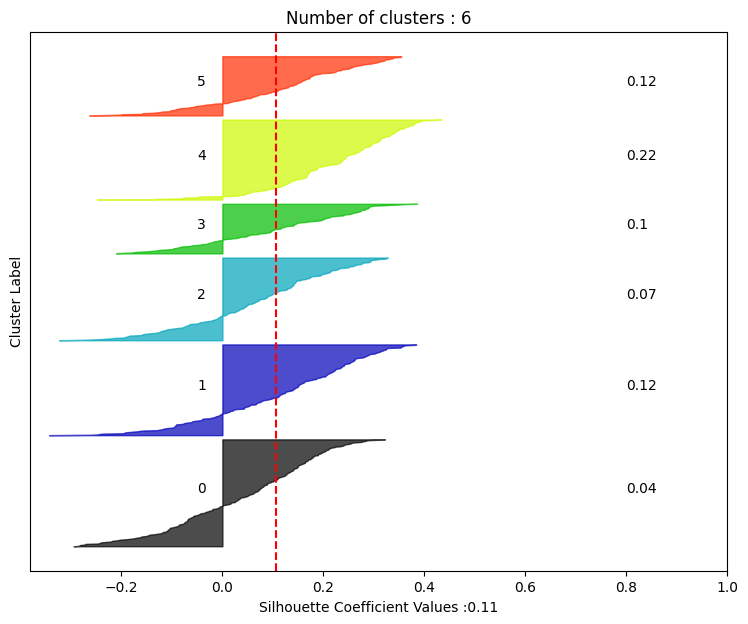

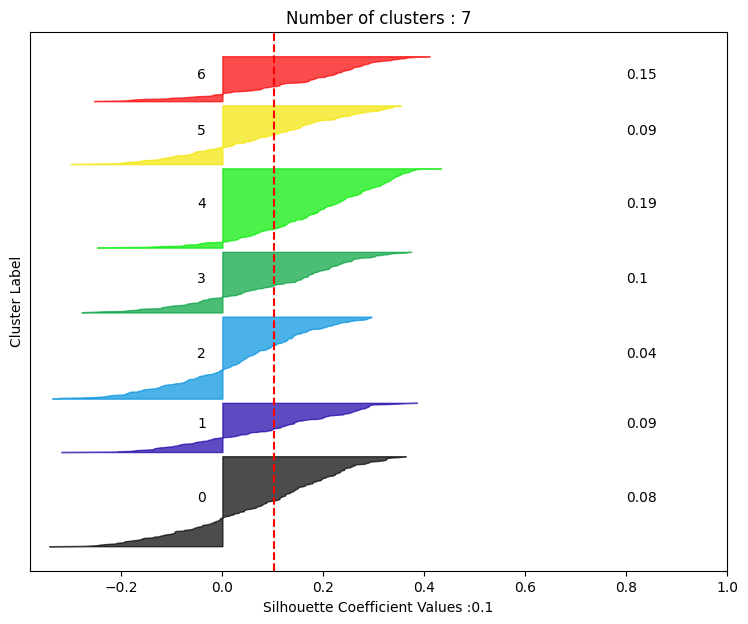

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.cluster import AgglomerativeClustering

def plot_silhouette(X, range_n_clusters, metric):
    """
    X : 입력 데이터
    range_n_clusters : 군집 개수 범위 (list 형태)
    metric: 거리 측정 방법
    """
    for n_clusters in range_n_clusters:
        fig, ax = plt.subplots(1, 1)
        fig.set_size_inches(9, 7)

        # 클러스터링 모델 학습
        agg = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', distance_threshold=None, metric=metric)
        cluster_labels = agg.fit_predict(X)

        # 모든 샘플의 실루엣 계수를 계산
        silhouette_avg = silhouette_score(X, cluster_labels)
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # i번째 클러스터에 속한 샘플들의 실루엣 계수 값을 추출하여 정렬
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)

            ax.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # 클러스터 이름 및 평균 실루엣 계수 값을 그래프에 입력
            ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            ax.text(0.8, y_lower + 0.5 * size_cluster_i,
                    str(round(np.mean(ith_cluster_silhouette_values), 2)))
            y_lower = y_upper + 10

        ax.set_title("Number of clusters : " + str(n_clusters))
        ax.set_xlabel("Silhouette Coefficient Values :{mean}".format(mean=round(silhouette_avg,2)))
        ax.set_ylabel("Cluster Label")

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax.set_yticks([])  # Clear the yaxis labels / ticks
        ax.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.show()

plot_silhouette(principalDf,[3,4,5,6,7],'euclidean')


In [37]:
Agg = AgglomerativeClustering(n_clusters=5, linkage='average',metric='cosine')

print(pd.DataFrame(df).groupby(Agg.fit_predict(principalDf)).size())
cluster_agg = pd.DataFrame(df).groupby(Agg.fit_predict(principalDf)).mean()
cluster_agg

0    422
1    369
2    142
3    100
4    193
dtype: int64


,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,0.650333,0.198739,0.708201,0.073472,18.127580,29.983883,3.979038
1,0.543475,0.092073,0.792074,0.042212,17.290608,33.300365,3.878356
2,0.732917,0.111041,0.704662,0.042733,15.929570,30.168586,3.833173
3,0.687019,0.154621,0.756335,0.043531,18.842369,34.128365,4.811245
4,0.709460,0.110920,0.809528,0.039119,20.657933,36.395910,3.780863


In [38]:
df.describe()

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
count,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000,1226.000000
mean,0.640037,0.139054,0.752912,0.052653,18.077724,32.350913,3.968523
std,0.116878,0.074006,0.081993,0.024070,2.939610,4.170700,0.590157
min,0.279927,0.000000,0.388189,0.004125,7.088235,18.394737,2.400000
25%,0.562538,0.086134,0.708409,0.035610,16.361742,29.652431,3.564833
50%,0.644725,0.131421,0.766965,0.049190,17.978299,32.383333,3.937500
75%,0.719692,0.181630,0.810380,0.065318,19.949342,34.925116,4.312500
max,0.953549,0.489052,0.920070,0.161810,28.281250,44.666667,6.320000


너무 많음...
***
## spectral

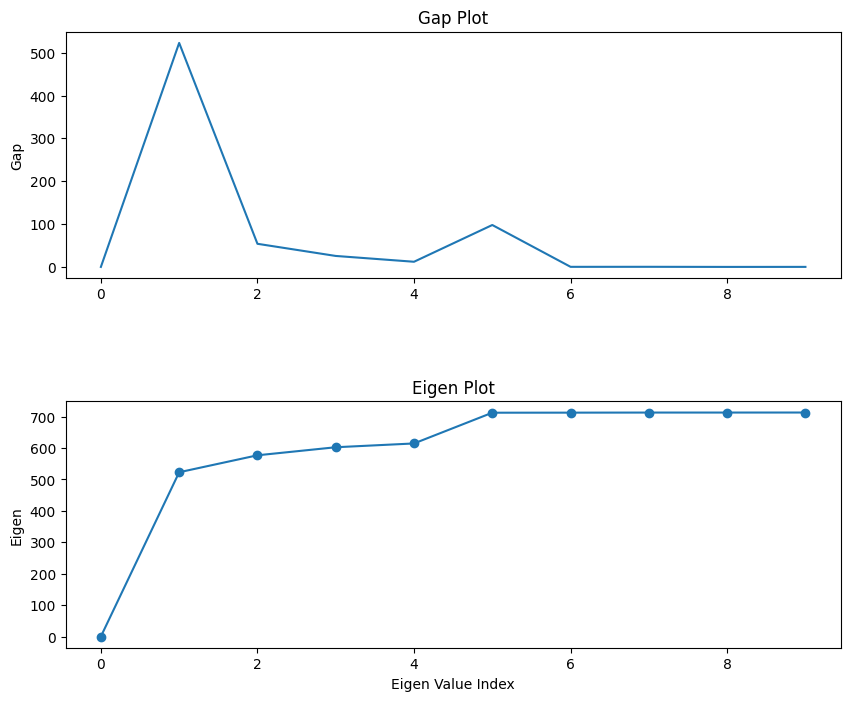

Optimal number of clusters: 1


In [39]:
from sklearn.cluster import SpectralClustering
from scipy.sparse.linalg import eigsh

# 유사도 행렬 생성
distances = pairwise_distances(principalDf, metric='cosine')
affinity = np.exp(-distances ** 2 / (2. * np.median(distances)))

# Eigenvalue 분해
laplacian = np.diag(affinity.sum(axis=1)) - affinity
eigenvals, eigenvecs = eigsh(laplacian, k=10, which='SM')

# Eigen Gap 계산
gaps = list(np.diff(eigenvals))
gaps.insert(0,0)
# Gap 시각화
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
plt.axes(axes[0])
plt.plot(gaps)
plt.title('Gap Plot')
plt.ylabel('Gap')

plt.axes(axes[1])
plt.plot(eigenvals,marker='o')
plt.title('Eigen Plot')
plt.xlabel('Eigen Value Index')
plt.ylabel('Eigen')

plt.subplots_adjust(hspace=0.5)
plt.show()

# 최적의 군집 개수 계산
k = np.argmax(gaps)
print('Optimal number of clusters:', k)

In [40]:
# Spectral Clustering
sc = SpectralClustering(n_clusters=6, affinity='precomputed', assign_labels='kmeans')
labels = sc.fit_predict(distances)

Counter(labels)

Counter({0: 965, 1: 142, 4: 104, 5: 10, 2: 4, 3: 1})

In [41]:
print(pd.DataFrame(df).groupby(labels).size())
spectral = pd.DataFrame(df).groupby(labels).mean()
spectral

0    965
1    142
2      4
3      1
4    104
5     10
dtype: int64


,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one
0,0.638925,0.138321,0.750793,0.053224,17.988524,32.295743,3.966608
1,0.641131,0.142316,0.765430,0.049673,18.504529,32.496606,3.978931
2,0.573139,0.230141,0.733096,0.057487,19.501031,31.716427,3.901728
3,0.871205,0.103199,0.689900,0.048704,20.281250,39.468750,3.562500
4,0.648353,0.136840,0.758222,0.051590,18.280699,32.725342,3.944685
5,0.648888,0.153686,0.738654,0.049382,17.724326,31.253893,4.320691


군집화가 적합하지 않대요
***
# Kmeans with visualization

In [42]:
df['cl'] = kmeans.labels_

In [43]:
dfs = df.reset_index(drop=True)
dfss = pd.concat([dfs,principalDf],axis=1)
dfss

,in_rate,heading_rate,short_rate,long_rate,side_one,center_one,df_one,cl,0,1,2,3
0,0.604722,0.130556,0.880041,0.035906,14.525000,42.766667,4.050000,0,-2.235583,0.276740,0.271922,-0.145501
1,0.501940,0.129230,0.779673,0.068342,19.953125,35.046875,4.109375,1,-0.594863,-0.011818,0.843333,1.197454
2,0.832239,0.429663,0.798512,0.060786,18.266667,36.000000,4.506667,2,1.375950,-2.400384,1.963909,-0.811625
3,0.523737,0.154545,0.772228,0.058769,18.454545,28.454545,4.690909,1,0.394270,0.928444,1.193078,0.556678
4,0.817560,0.121354,0.610595,0.051902,18.515625,29.906250,3.515625,2,1.283053,-0.660185,-1.198109,-1.226025
...,...,...,...,...,...,...,...,...,...,...,...,...
1221,0.758310,0.057586,0.832230,0.010402,12.058824,34.000000,4.458824,1,-1.323867,1.601144,-0.624169,-2.132177
1222,0.668385,0.026984,0.785109,0.035314,16.464286,36.571429,3.553571,0,-1.545875,0.382969,-1.174618,-0.505337
1223,0.570991,0.161253,0.685540,0.075551,21.450000,26.633333,4.616667,2,1.366299,0.126552,1.299183,0.566328
1224,0.381407,0.161710,0.806856,0.032023,17.475000,29.080000,3.720000,1,-0.581630,1.217568,-0.108721,1.685830


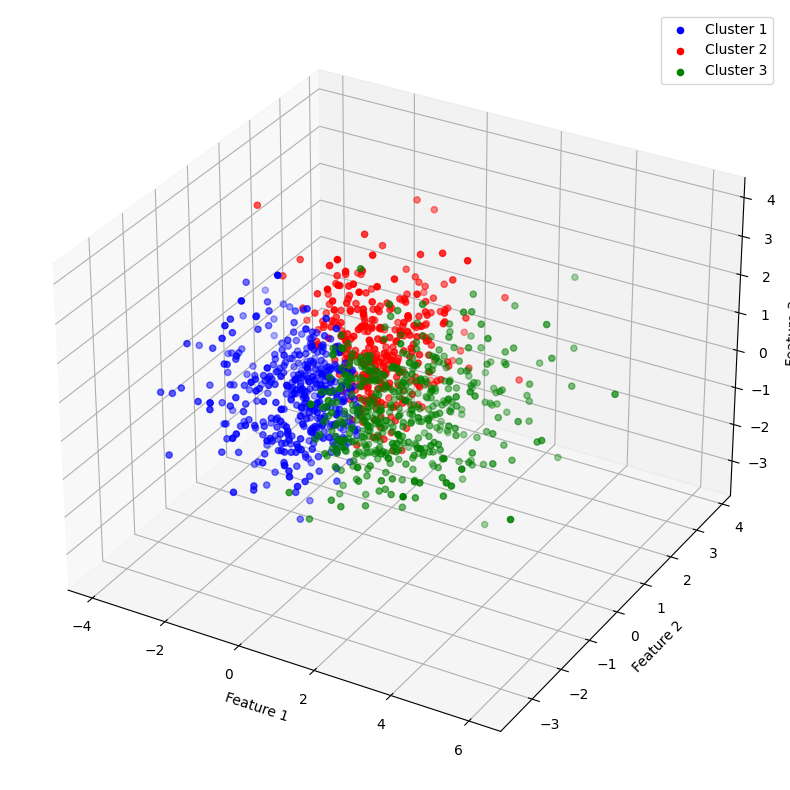

In [44]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfss.loc[dfss['cl'] == 0, 0], dfss.loc[dfss['cl'] == 0, 1], dfss.loc[dfss['cl'] == 0, 2], c='blue', label='Cluster 1')
ax.scatter(dfss.loc[dfss['cl'] == 1, 0], dfss.loc[dfss['cl'] == 1, 1], dfss.loc[dfss['cl'] == 1, 2], c='red', label='Cluster 2')
ax.scatter(dfss.loc[dfss['cl'] == 2, 0], dfss.loc[dfss['cl'] == 2, 1], dfss.loc[dfss['cl'] == 2, 2], c='green', label='Cluster 3')
#ax.scatter(dfss.loc[dfss['cl'] == 3, 0], dfss.loc[dfss['cl'] == 3, 1], dfss.loc[dfss['cl'] == 3, 2], c='yellow', label='Cluster 4')
#ax.scatter(dfss.loc[dfss['cl'] == 4, 0], dfss.loc[dfss['cl'] == 4, 1], dfss.loc[dfss['cl'] == 4, 2], c='purple', label='Cluster 5')
#ax.scatter(dfss.loc[dfss['cl'] == 5, 0], dfss.loc[dfss['cl'] == 5, 1], dfss.loc[dfss['cl'] == 5, 2], c='purple', label='Cluster 6')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()


In [45]:
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

# 데이터 생성
cluster_labels = dfs['cl'].unique()
clusters = [dfs[dfs['cl'] == i] for i in cluster_labels]

# 3D Scatter Plot 생성
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

for i in range(len(cluster_labels)):
    fig.add_trace(
        go.Scatter3d(x=clusters[i]['in_rate'], y=clusters[i]['short_rate'], z=clusters[i]['center_one'], 
                     mode='markers', 
                     marker=dict(size=3, colorscale='Viridis', opacity=0.8), 
                     name=f'Cluster {i}')
    )
    
# 레이아웃 설정
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'), 
                  margin=dict(l=0, r=0, b=0, t=0))

# FigureWidget 생성
fig.show()


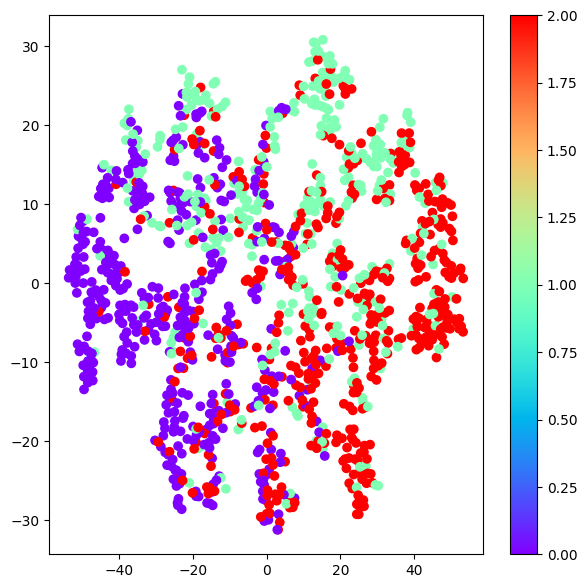

In [46]:
from sklearn.manifold import TSNE

# t-SNE 객체 생성
tsne = TSNE(n_components=2, perplexity=30, random_state=42)

# t-SNE 학습
df3 = df.drop('cl',axis=1)
X_embedded = tsne.fit_transform(df3)

labels = kmeans.labels_

# 군집화 결과 시각화
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=labels, cmap='rainbow')
plt.colorbar()
plt.show()

In [47]:
# t-sne 모델 생성
tsne = TSNE(n_components=3, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df3)

# 3D Scatter Plot 생성
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'scatter3d'}]])

fig.add_trace(
    go.Scatter3d(x=X_tsne[:,0], y=X_tsne[:,1], z=X_tsne[:,2], 
                 mode='markers', 
                 marker=dict(size=3, color= labels, colorscale='Viridis', opacity=0.8), 
                 name='Clusters')
)

# 레이아웃 설정
fig.update_layout(scene=dict(xaxis_title='Feature 1', yaxis_title='Feature 2', zaxis_title='Feature 3'), 
                  margin=dict(l=0, r=0, b=0, t=0))

# FigureWidget 생성
fig.show()


# 포메이션과 접목

In [48]:
# 추가 이상치 제거 >> 표준화에 영향을 주지않을정도로만..
user_data = user_data[user_data.center_one > 17]
user_data = user_data[user_data.center_one < 46]
user_data = user_data[user_data.side_one > 5]
user_data = user_data[user_data.heading_rate < 0.5] 
user_data = user_data[user_data.short_rate > 0.3]
user_data.reset_index(drop=True, inplace=True)
user_data['labels'] = kmeans.labels_

In [49]:
user_data.groupby(['formation','labels']).size()

formation  labels
424        0           2
           1           8
           2          22
433        0          45
           1          55
           2         109
442        0          40
           1          27
           2          45
451        0         291
           1         128
           2         210
523        0          33
           1          75
           2          54
532        0           9
           1          48
           2          25
dtype: int64

In [50]:
win_lose = pd.merge(user_data,data[['id_formation','matchResult']],how='left',on='id_formation')
win_lose.groupby(['formation','labels']).matchResult.value_counts()

formation  labels  matchResult
424        0       승                11
                   패                 7
                   무                 5
           1       패                45
                   승                37
                   무                27
           2       패               123
                   승               117
                   무                68
433        0       승               283
                   패               265
                   무               124
           1       승               336
                   패               306
                   무               178
           2       승               631
                   패               596
                   무               344
442        0       승               259
                   패               244
                   무               107
           1       승               161
                   패               153
                   무                75
           2       승             

# 최종 군집화 결과 저장

In [51]:
win_lose[['id_formation','formation','labels','matchResult']].to_csv('/content/drive/MyDrive/평진/데이터분석/FIFA_ONLINE4_analysis/id_formation.csv',encoding='cp949')

# 무작위 매치 데이터의 플레이스타일 예측

In [52]:
randoms = pd.read_csv('/content/drive/MyDrive/평진/데이터분석/핍파/full_matches.csv',encoding='cp949', index_col=0)

In [53]:
randoms.shape

(12644, 28)

## 학습 데이터와 같은 전처리 진행

In [54]:
randoms = randoms[randoms.center_one_x > 17]
randoms = randoms[randoms.center_one_x < 46]
randoms = randoms[randoms.side_one_x > 5]
randoms = randoms[randoms.heading_rate_x < 0.5] 
randoms = randoms[randoms.short_rate_x > 0.3]

randoms = randoms[randoms.center_one_y > 17]
randoms = randoms[randoms.center_one_y < 46]
randoms = randoms[randoms.side_one_y > 5]
randoms = randoms[randoms.heading_rate_y < 0.5] 
randoms = randoms[randoms.short_rate_y > 0.3]

In [55]:
home_df = randoms[['in_rate_x','heading_rate_x','short_rate_x','long_rate_x','side_one_x','center_one_x','df_one_x']]
home_df.columns = ['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one']

away_df = randoms[['in_rate_y','heading_rate_y','short_rate_y','long_rate_y','side_one_y','center_one_y','df_one_y']]
away_df.columns = ['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one']

In [56]:
# standard scaling
h = scaler.transform(home_df) # x객체에 x를 표준화한 데이터를 저장
features = ['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one']
home_df = pd.DataFrame(h, columns=features)

a = scaler.transform(away_df) # x객체에 x를 표준화한 데이터를 저장
features = ['in_rate','heading_rate','short_rate','long_rate','side_one','center_one','df_one']
away_df = pd.DataFrame(a, columns=features)

In [57]:
# PCA
printcipalComponents = pca.transform(home_df)
home_df = pd.DataFrame(data=printcipalComponents)

printcipalComponents = pca.transform(away_df)
away_df = pd.DataFrame(data=printcipalComponents)

기존 데이터와의 코사인 유사도를 계산해야됨

In [58]:
# Kmeans
distances = 1 - np.dot(home_df,principalDf.T)
randoms['home_cl'] = kmeans.predict(distances)

distances = 1 - np.dot(away_df,principalDf.T)
randoms['away_cl'] = kmeans.predict(distances)

In [59]:
randoms

,matchId,matchDate_x,matchType_x,matchInfo_x,matchDate_y,matchType_y,matchInfo_y,home_score,away_score,diff,...,in_rate_y,heading_rate_y,short_rate_y,long_rate_y,side_one_y,center_one_y,df_one_y,formation_y,home_cl,away_cl
2,643bed38775de421a1838757,2023-04-16T21:52:53,50,"{'accessId': '004ed741426633f14e3e8b5b', 'nick...",2023-04-16T21:52:53,50.0,"{'accessId': 'd0008c9f549c70e4816dfe03', 'nick...",5,0,5,...,0.500000,0.333333,0.670588,0.141176,11.75,26.75,3.00,451,0,2
7,643824bf9122674779bb3143,2023-04-14T01:00:08,50,"{'accessId': '004ed741426633f14e3e8b5b', 'nick...",2023-04-14T01:00:08,50.0,"{'accessId': '18be39a4e3813b6887e9daf5', 'nick...",0,2,2,...,0.833333,0.000000,0.709924,0.068702,17.25,22.75,5.00,451,1,2
8,64381fbfae8e75e54fd47c31,2023-04-14T00:39:00,50,"{'accessId': '004ed741426633f14e3e8b5b', 'nick...",2023-04-14T00:39:00,50.0,"{'accessId': '8a9077cd8aa0d9addc969cc9', 'nick...",1,1,0,...,0.833333,0.166667,0.868421,0.026316,16.75,35.00,3.50,451,2,0
9,64381c7e07db962b26bf325b,2023-04-14T00:25:46,50,"{'accessId': '004ed741426633f14e3e8b5b', 'nick...",2023-04-14T00:25:46,50.0,"{'accessId': 'b0177e85b89e7705c0bfe367', 'nick...",3,3,0,...,0.500000,0.250000,0.709677,0.086022,15.50,27.00,5.00,523,0,2
10,643819ce9b8befa9bba4b574,2023-04-14T00:14:41,50,"{'accessId': '004ed741426633f14e3e8b5b', 'nick...",2023-04-14T00:14:41,50.0,"{'accessId': '77129c750c268deb872a8522', 'nick...",3,6,3,...,0.750000,0.000000,0.683673,0.040816,15.75,31.00,3.00,451,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12639,643bf901b0a24c56567ef2dd,2023-04-16T22:44:17,50,"{'accessId': '4f6a1c003113870ce2414e60', 'nick...",2023-04-16T22:44:17,50.0,"{'accessId': '88b78189a95446015d612b01', 'nick...",2,2,0,...,0.750000,0.250000,0.661538,0.092308,7.50,20.60,3.60,523,2,2
12640,643abea8cccaff176b379f33,2023-04-16T00:21:41,50,"{'accessId': '88b78189a95446015d612b01', 'nick...",2023-04-16T00:21:41,50.0,"{'accessId': '49e4a2942716f69ad4836a0a', 'nick...",0,3,3,...,0.700000,0.400000,0.758065,0.088710,28.50,35.20,3.00,523,2,2
12641,643abc1708c0d61e518ac442,2023-04-16T00:11:12,50,"{'accessId': '88b78189a95446015d612b01', 'nick...",2023-04-16T00:11:12,50.0,"{'accessId': 'adf5cf7b4cc2dea15ca84aaa', 'nick...",2,4,2,...,0.857143,0.000000,0.810219,0.029197,25.25,37.50,3.00,451,1,0
12642,643ab8e6deec3d9a72eda405,2023-04-15T23:57:58,50,"{'accessId': '88b78189a95446015d612b01', 'nick...",2023-04-15T23:57:58,50.0,"{'accessId': 'e20dd4341a9f7a49c7fe97fa', 'nick...",3,1,2,...,0.666667,0.000000,0.840000,0.026667,23.75,41.50,2.75,451,1,0


In [60]:
randoms['result'] = randoms['diff'].apply(lambda x : 1 if x>0  else 0)

In [61]:
randoms = randoms[(randoms.formation_x != 424) & (randoms.formation_x != 0) ]
randoms = randoms[(randoms.formation_y != 424) & (randoms.formation_y != 0) ]
randoms.shape

(8903, 31)

In [62]:
randoms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8903 entries, 2 to 12643
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   matchId         8903 non-null   object 
 1   matchDate_x     8903 non-null   object 
 2   matchType_x     8903 non-null   int64  
 3   matchInfo_x     8903 non-null   object 
 4   matchDate_y     8903 non-null   object 
 5   matchType_y     8903 non-null   float64
 6   matchInfo_y     8903 non-null   object 
 7   home_score      8903 non-null   int64  
 8   away_score      8903 non-null   int64  
 9   diff            8903 non-null   int64  
 10  homeid          8903 non-null   object 
 11  awayid          8903 non-null   object 
 12  in_rate_x       8903 non-null   float64
 13  heading_rate_x  8903 non-null   float64
 14  short_rate_x    8903 non-null   float64
 15  long_rate_x     8903 non-null   float64
 16  side_one_x      8903 non-null   float64
 17  center_one_x    8903 non-null   

In [63]:
randoms['formation_cl_x'] = randoms['formation_x'].astype('str') + '_' + randoms['home_cl'].astype('str')
randoms['formation_cl_y'] = randoms['formation_y'].astype('str') + '_' + randoms['away_cl'].astype('str')

In [64]:
# 모든 플레이어 목록 추출
players = sorted(list(set(randoms['formation_cl_x']).union(set(randoms['formation_cl_y']))))

# 상대 승률 행렬 초기화
win_matrix = pd.DataFrame(index=players, columns=players).fillna(0)

# 상대 승률 계산
for p1, p2, result in randoms[['formation_cl_x', 'formation_cl_y', 'result']].values:
    if result == 1:
        win_matrix.loc[p1, p2] += 1
    else:
        win_matrix.loc[p2, p1] += 1

# 총 경기수 계산
total_matches = win_matrix + win_matrix.T

# 상대 승률 계산
win_rate_matrix = win_matrix / total_matches

## 포지션, 스타일 별 최종 교차 테이블
표본 수가 적은 승률은 신뢰할 수 없지만, 표본수가 큰 승률에서도 유의미한 차이가 보이는것으로 판단된다.

In [65]:
cross_table = pd.DataFrame(index=players, columns=players).fillna(0)

for row in players:
    for col in players:
        cross_table.loc[row,col] = f'{win_rate_matrix.loc[row,col].round(2)}, ({total_matches.loc[row,col]})'
cross_table

,433_0,433_1,433_2,442_0,442_1,442_2,451_0,451_1,451_2,523_0,523_1,523_2,532_0,532_1,532_2
433_0,"0.5, (48)","0.46, (65)","0.43, (94)","0.48, (27)","0.33, (33)","0.41, (56)","0.51, (198)","0.5, (118)","0.46, (173)","0.46, (24)","0.42, (65)","0.38, (60)","0.62, (13)","0.52, (25)","0.48, (27)"
433_1,"0.54, (65)","0.5, (68)","0.56, (94)","0.43, (30)","0.42, (26)","0.5, (38)","0.55, (165)","0.55, (113)","0.44, (151)","0.45, (29)","0.49, (47)","0.4, (57)","0.4, (5)","0.48, (23)","0.47, (19)"
433_2,"0.57, (94)","0.44, (94)","0.5, (174)","0.48, (54)","0.57, (63)","0.5, (66)","0.49, (336)","0.45, (217)","0.53, (277)","0.52, (60)","0.44, (99)","0.59, (83)","0.38, (24)","0.43, (37)","0.69, (32)"
442_0,"0.52, (27)","0.57, (30)","0.52, (54)","0.5, (18)","0.62, (13)","0.5, (32)","0.47, (141)","0.4, (87)","0.51, (99)","0.5, (14)","0.44, (43)","0.39, (28)","0.75, (12)","0.61, (23)","0.69, (16)"
442_1,"0.67, (33)","0.58, (26)","0.43, (63)","0.38, (13)","0.5, (8)","0.54, (26)","0.47, (89)","0.39, (62)","0.5, (86)","0.14, (7)","0.48, (29)","0.64, (25)","0.5, (6)","0.45, (11)","0.62, (13)"
442_2,"0.59, (56)","0.5, (38)","0.5, (66)","0.5, (32)","0.46, (26)","0.5, (36)","0.5, (166)","0.46, (96)","0.47, (128)","0.44, (25)","0.42, (31)","0.62, (29)","0.46, (13)","0.4, (15)","0.5, (12)"
451_0,"0.49, (198)","0.45, (165)","0.51, (336)","0.53, (141)","0.53, (89)","0.5, (166)","0.5, (628)","0.47, (436)","0.53, (658)","0.49, (93)","0.53, (180)","0.52, (197)","0.54, (54)","0.46, (111)","0.45, (96)"
451_1,"0.5, (118)","0.45, (113)","0.55, (217)","0.6, (87)","0.61, (62)","0.54, (96)","0.53, (436)","0.5, (294)","0.54, (357)","0.42, (69)","0.47, (95)","0.61, (100)","0.55, (42)","0.49, (53)","0.52, (58)"
451_2,"0.54, (173)","0.56, (151)","0.47, (277)","0.49, (99)","0.5, (86)","0.53, (128)","0.47, (658)","0.46, (357)","0.5, (458)","0.55, (92)","0.45, (150)","0.54, (129)","0.5, (44)","0.49, (72)","0.54, (65)"
523_0,"0.54, (24)","0.55, (29)","0.48, (60)","0.5, (14)","0.86, (7)","0.56, (25)","0.51, (93)","0.58, (69)","0.45, (92)","0.5, (18)","0.49, (37)","0.45, (38)","0.43, (7)","0.45, (20)","0.43, (14)"


In [66]:
lens = cross_table.shape[0]
for i in range(lens):
    for j in range(lens):
        cross_table.iloc[i,j] = cross_table.iloc[i,j] if i >= j else '' 
cross_table

,433_0,433_1,433_2,442_0,442_1,442_2,451_0,451_1,451_2,523_0,523_1,523_2,532_0,532_1,532_2
433_0,"0.5, (48)",,,,,,,,,,,,,,
433_1,"0.54, (65)","0.5, (68)",,,,,,,,,,,,,
433_2,"0.57, (94)","0.44, (94)","0.5, (174)",,,,,,,,,,,,
442_0,"0.52, (27)","0.57, (30)","0.52, (54)","0.5, (18)",,,,,,,,,,,
442_1,"0.67, (33)","0.58, (26)","0.43, (63)","0.38, (13)","0.5, (8)",,,,,,,,,,
442_2,"0.59, (56)","0.5, (38)","0.5, (66)","0.5, (32)","0.46, (26)","0.5, (36)",,,,,,,,,
451_0,"0.49, (198)","0.45, (165)","0.51, (336)","0.53, (141)","0.53, (89)","0.5, (166)","0.5, (628)",,,,,,,,
451_1,"0.5, (118)","0.45, (113)","0.55, (217)","0.6, (87)","0.61, (62)","0.54, (96)","0.53, (436)","0.5, (294)",,,,,,,
451_2,"0.54, (173)","0.56, (151)","0.47, (277)","0.49, (99)","0.5, (86)","0.53, (128)","0.47, (658)","0.46, (357)","0.5, (458)",,,,,,
523_0,"0.54, (24)","0.55, (29)","0.48, (60)","0.5, (14)","0.86, (7)","0.56, (25)","0.51, (93)","0.58, (69)","0.45, (92)","0.5, (18)",,,,,


In [67]:
cross_table.to_csv('/content/drive/MyDrive/평진/데이터분석/FIFA_ONLINE4_analysis/데이터/cross_table.csv')